In [1]:
print('Hi')

Hi


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('Data_atm (2).csv')
df.head()

,time,id,rms,avg,min,max,K
0,2020-07-01 00:00:00.00,5efbd21043faed19e89048a4,378.847992,377.264313,309.152496,447.706543,NaN
1,2020-07-01 00:00:10.00,5efbd21943faed19e89048c3,338.466248,337.819580,295.480194,377.697083,NaN
2,2020-07-01 00:00:20.00,5efbd22743faed19e89048e2,375.522247,375.309845,339.854126,396.557526,NaN
3,2020-07-01 00:00:30.00,5efbd23343faed19e8904901,379.300110,378.927887,338.755463,406.628632,NaN
4,2020-07-01 00:00:40.00,5efbd24143faed19e8904920,412.683197,412.269012,382.519012,447.279266,NaN


In [40]:
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [41]:
cols_to_drop = ['id', 'avg','min','max','K']
df = df.drop(cols_to_drop, axis=1)

In [42]:
df.head()

,time,rms
0,2020-07-01 00:00:00.00,378.847992
1,2020-07-01 00:00:10.00,338.466248
2,2020-07-01 00:00:20.00,375.522247
3,2020-07-01 00:00:30.00,379.300110
4,2020-07-01 00:00:40.00,412.683197


In [43]:
df = df.set_index('time')
df.index =pd.to_datetime(df.index)

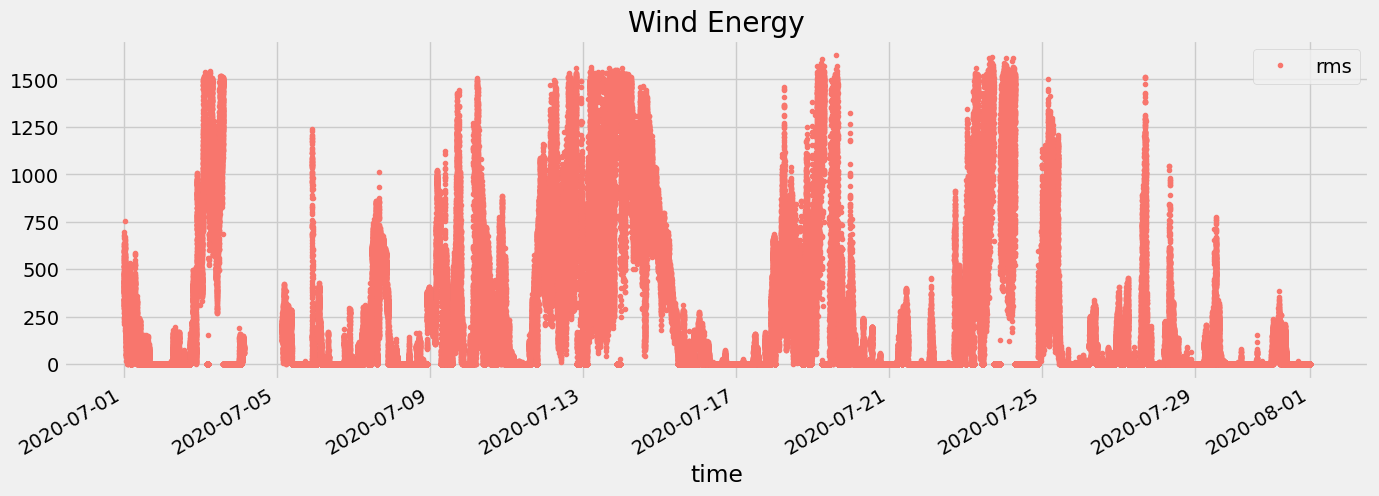

In [44]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Wind Energy')
plt.show()

In [45]:
train = df.loc[df.index < '2020-07-20'] 
test = df.loc[df.index >= '2020-07-20'] 

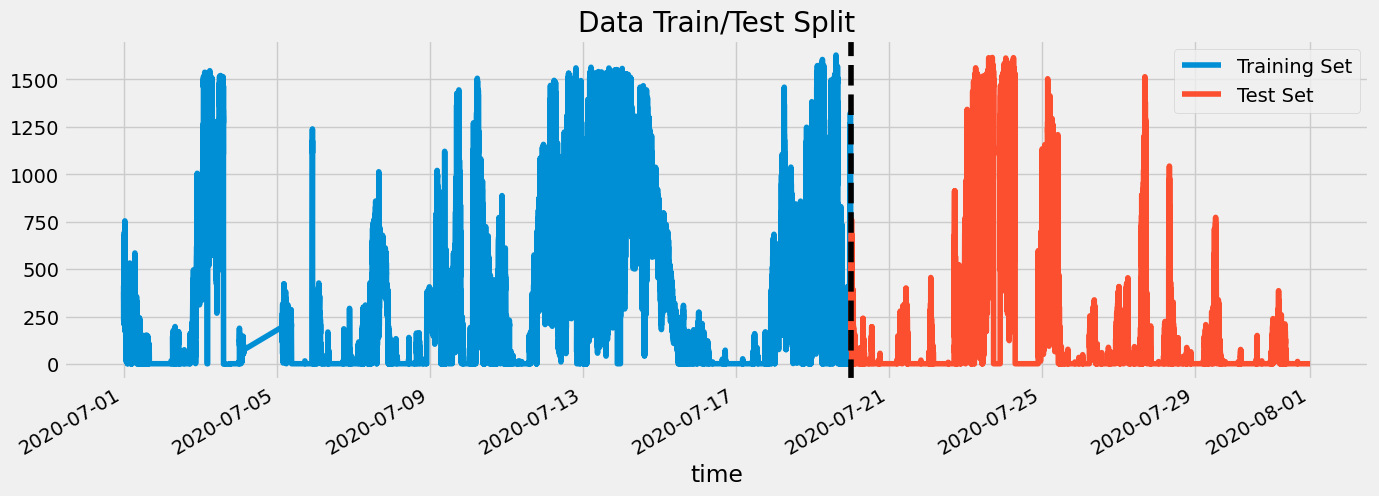

In [46]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-07-20', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [24]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [27]:
X_train, y_train = create_features(train, label='rms')
X_test, y_test = create_features(test, label='rms')

C:\Users\admin\AppData\Local\Temp\ipykernel_11464\752915949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\admin\AppData\Local\Temp\ipykernel_11464\752915949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\admin\AppData\Local\Temp\ipykernel_11464\752915949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [28]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
test['rms_Prediction'] = reg.predict(X_test)
Power_all = pd.concat([test,train], sort=False)

C:\Users\admin\AppData\Local\Temp\ipykernel_11464\963989149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rms_Prediction'] = reg.predict(X_test)


<Axes: xlabel='time'>

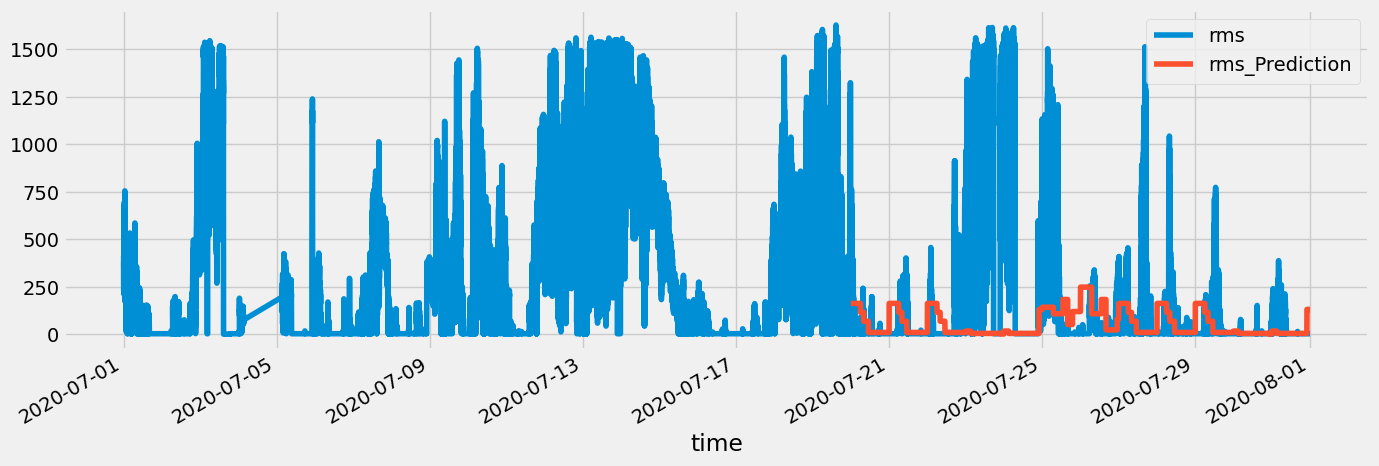

In [32]:
Power_all[['rms','rms_Prediction']].plot(figsize=(15, 5))